In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv("/kaggle/input/covid19-tweets/covid19_tweets.csv").iloc[0:10000]


In [2]:
import os
! apt-get update -qq > /dev/null  

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version
 # TODO make install SILENT! and upgrade
! pip install  nlu==2.5rc1 -qq > /dev/null  

import nlu

debconf: delaying package configuration, since apt-utils is not installed
openjdk version "1.8.0_265"
OpenJDK Runtime Environment (build 1.8.0_265-8u265-b01-0ubuntu2~18.04-b01)
OpenJDK 64-Bit Server VM (build 25.265-b01, mixed mode)


classifierdl_use_emotion download started this may take some time.
Approximate size to download 20.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


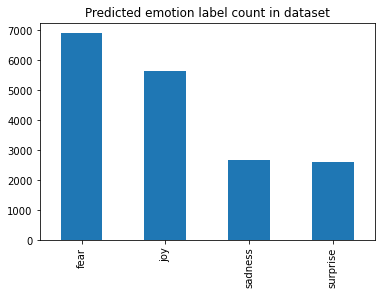

In [3]:
import nlu

emotion_predictions = nlu.load('emotion').predict(df)
emotion_predictions['category'].value_counts().plot.bar(title='Predicted emotion label count in dataset')

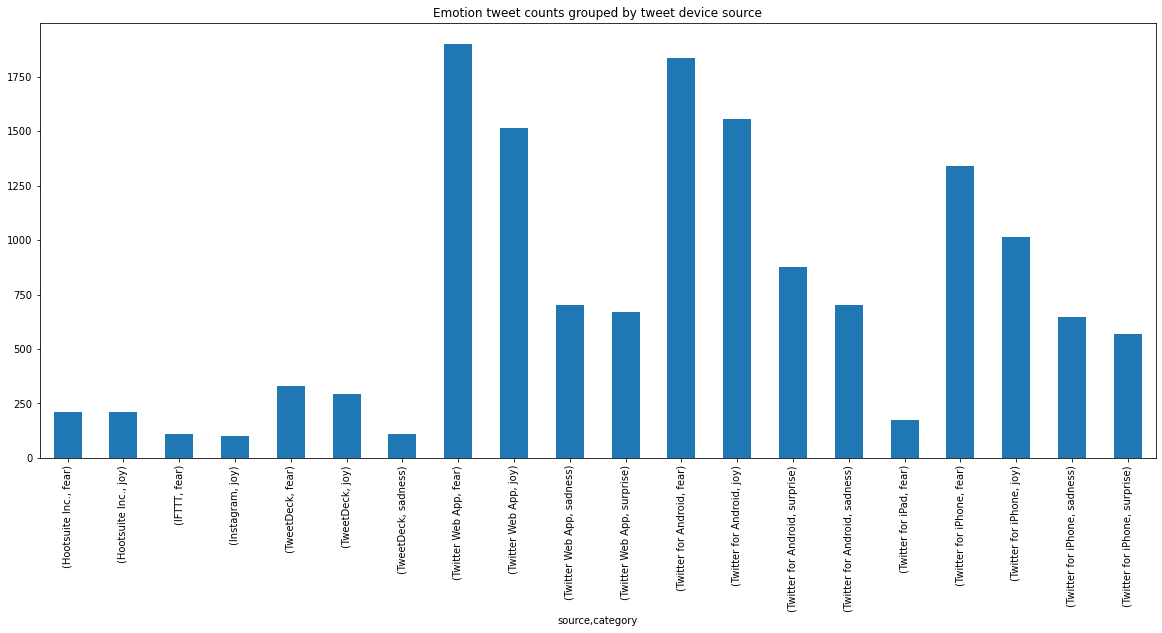

In [9]:
counts = emotion_predictions.groupby(['source'])['category'].value_counts()
counts[counts > 100].plot.bar(figsize=(20,8), title= 'Emotion tweet counts grouped by tweet device source')

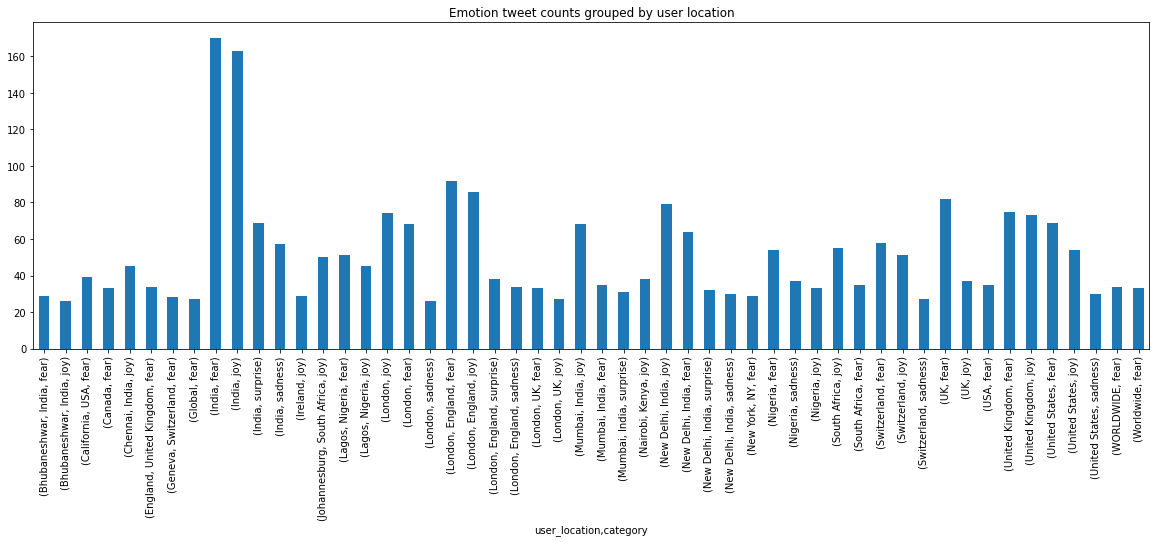

In [12]:
counts = emotion_predictions.groupby(['user_location'])['category'].value_counts()
counts[counts > 25].plot.bar(figsize=(20,6), title= 'Emotion tweet counts grouped by user location')